# Task Details 📝
Predict the price of the car based on the features in the dataset.

# Evaluation ✔️
A model with good r2 score

# **1. Importing Necessary Libraries** 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# **2. Loading Automobile Dataset** 📊

In [2]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Observations:
Now we start analysing our dataset but before that we need to do some data preprocessing in order to handle missing values and outliers. As you can see there are some '?' in normalized-losses column. 

# **3. Data Preprocessing (Cleaning) 🧹**

## (a) Checking for missing values

In [3]:
df.isnull().sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**No missing values.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Observations:**
* All columns have 205 non null entries but as we saw in head entries '?' are present which are actually missing values only.
* Columns with numerical values are of object type. For e.g normalized-losses, bore, stroke, horsepower, peak-rpm, price.

**Checking total entries with '?' in each column**

In [5]:
for col in df.columns:
    if('?' in df[col].values):
        print(col + " = " + str(len(df[df[col]=='?'])))

normalized-losses = 41
num-of-doors = 2
bore = 4
stroke = 4
horsepower = 2
peak-rpm = 2
price = 4


<ipython-input-5-4feed932ae88>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if('?' in df[col].values):


**Observations:**
* There are 41 '?' in normalized losses column
* Others have 2-4 entries with '?'.

**To handle**
* We will drop '?' entries of price column & num-of-doors column.
* We will replace '?' with mean value for every other column.

## (b) Handling Missing Values

**Removing '?' and changing data type**

In [6]:
# Converting price column type to numeric & Dropping '?' entries from price column 
df['price'] = df['price'].replace('?',np.nan)
df['price'] = pd.to_numeric(df['price'])
df = df[df['price'].notna()]

# Dropping '?' from num-of-doors column 
df['num-of-doors'] = df['num-of-doors'].replace('?',np.nan)
df = df[df['num-of-doors'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non


Initially we had 205 entries, and now we have 199 entries because we've dropped 4 '?' entries from price column and 2 entries from num-of-doors column.

In [7]:
# Converting column type to numeric and replacing '?' with mean value
num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in num_col:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.840491,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.840491,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.840491,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,121.840491,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,121.840491,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


# **4. Exploratory Data Analysis** 📉

In [8]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [9]:
print("List of Numerical features: " , df.select_dtypes(include=np.number).columns.tolist())
print("List of Categorical features: " , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features:  ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
List of Categorical features:  ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


## (a) Correlation Between Numerical Features

<AxesSubplot:>

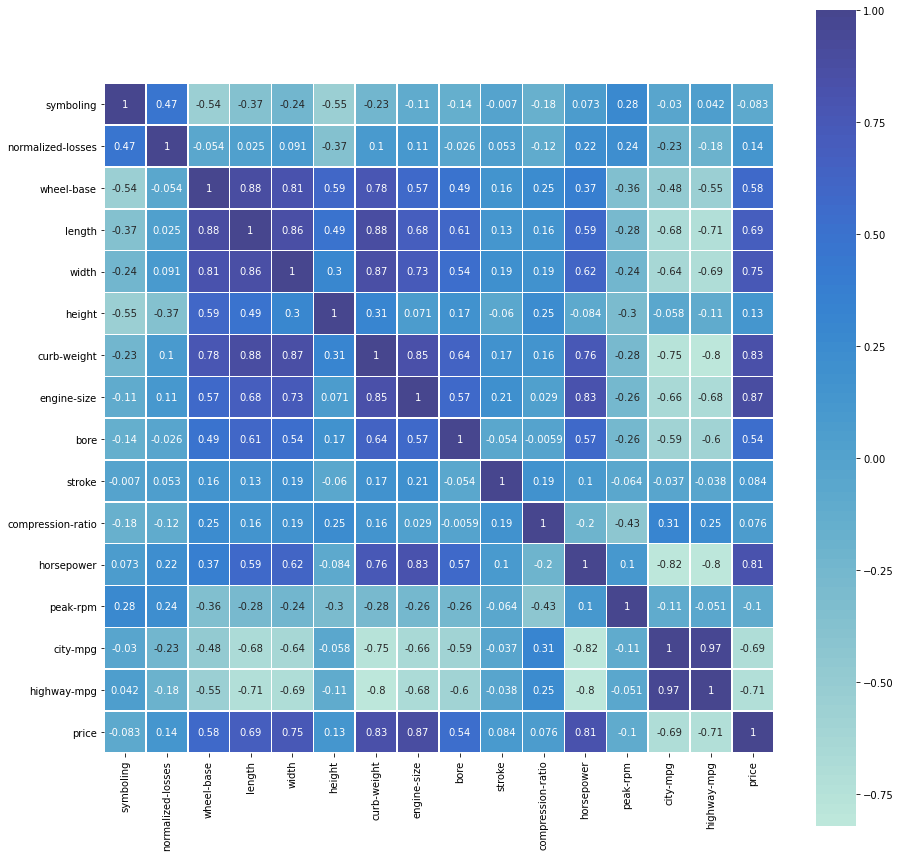

In [10]:
corr = df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].corr()
f,axes = plt.subplots(1,1,figsize = (15,15))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)


## (b) Correlation between numerical features and target Price

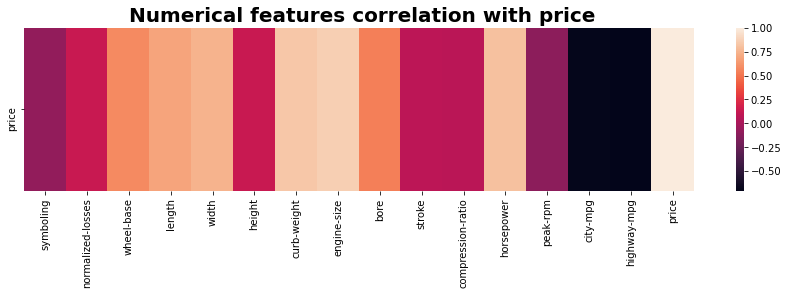

In [11]:
num = df.select_dtypes(include=np.number)
numcorr = num.corr()
f,ax = plt.subplots(figsize=(15,3))
sns.heatmap(numcorr.sort_values(by=['price'], ascending=False).head(1))
plt.title(" Numerical features correlation with price", weight='bold', fontsize=20)

plt.show()

Interesting! The engine-size,curb-weight, horsepower have the highest correlation values with the price.
**Example of a strong correlation between 2 numerical features: price and engine-size**

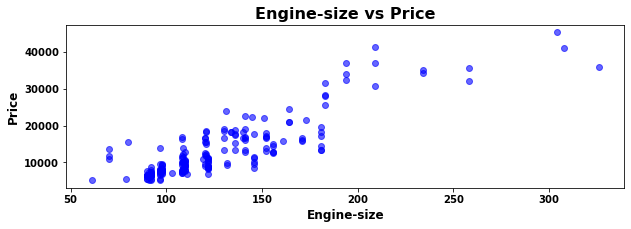

In [12]:
plt.figure(figsize=(10,3))
plt.scatter(x=df['engine-size'], y=df['price'], color='blue', alpha=0.6)
plt.title('Engine-size vs Price', weight='bold', fontsize=16)
plt.xlabel('Engine-size', weight='bold', fontsize=12)
plt.ylabel('Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

**Example of a strong correlation between 2 numerical features: price and horsepower**

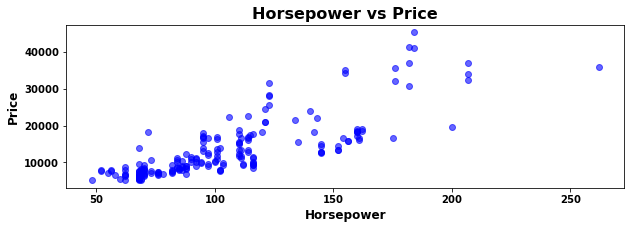

In [13]:
plt.figure(figsize=(10,3))
plt.scatter(x=df['horsepower'], y=df['price'], color='blue', alpha=0.6)
plt.title('Horsepower vs Price', weight='bold', fontsize=16)
plt.xlabel('Horsepower', weight='bold', fontsize=12)
plt.ylabel('Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

## (c) Univariate Distribution 
Picking one continuous variable and checking its distribution.

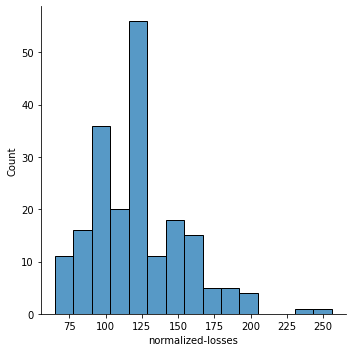

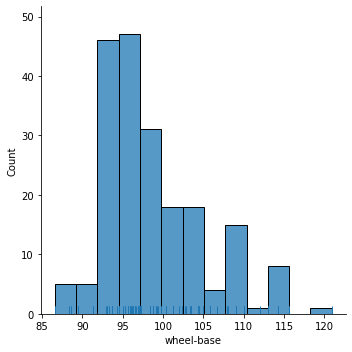

In [14]:
sns.displot(df['normalized-losses'])
plt.show()

sns.displot(df['wheel-base'], rug=True)
plt.show()


## (d) Bivariate Distribution

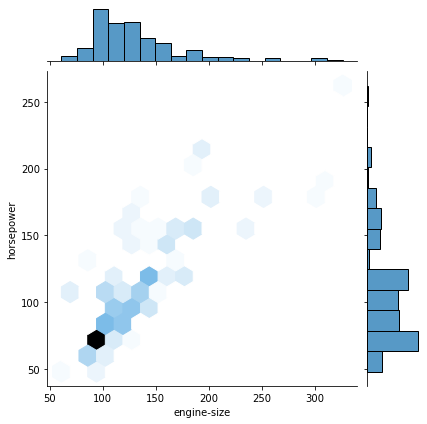

In [15]:
sns.jointplot(data = df, x=df['engine-size'], y=df['horsepower'], kind="hex")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


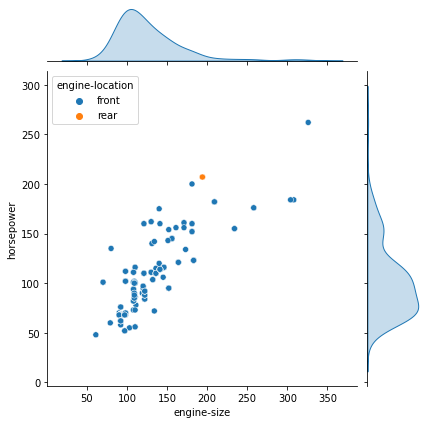

In [16]:
sns.jointplot(data = df, x=df['engine-size'], y=df['horsepower'], hue="engine-location")
plt.show()

Let's dig in more into the data, those are just the numerical features. I assume that categorical features will be very important like body-style.

In [17]:
df.rename(columns={'body-style': 'bodystyle'}, inplace=True)
df.rename(columns={'drive-wheels': 'drivewheels'}, inplace=True)

# **5. Feature Engineering** ⚙️

## (a) Checking Outliers

In [18]:
# For statistical description of numerical columns
df.describe() 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.844221,121.840491,98.822613,174.267839,65.896482,53.773869,2558.065327,127.045226,3.331949,3.255538,10.114171,103.604061,5118.020305,25.130653,30.633166,13242.613065
std,1.259651,32.103986,6.086103,12.323033,2.106373,2.446730,519.189151,41.703898,0.268538,0.317355,3.920762,37.448626,478.600274,6.408881,6.801746,7978.344857
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,99.500000,94.500000,166.800000,64.150000,52.000000,2157.000000,97.500000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,121.840491,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5118.020305,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In normalized-losses column most of the values are below 200 but maximum value is 256 that's weird!
Let's visualize the numerical quantities in our dataset as boxplots, to have a better sense of the outliers.

**Boxplot for Visualizing Outliers**

In [19]:
# Numerical Columns
df.select_dtypes(include=np.number).columns.tolist()

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

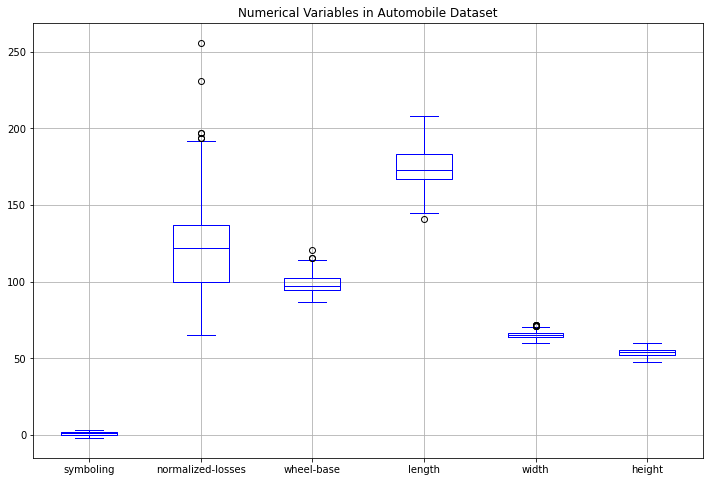

In [20]:
# Taking first 6 columns
numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height'] 
plt.figure(figsize=(12,8))
plt.title("Numerical Variables in Automobile Dataset")
df[numeric_cols].boxplot(color='blue')
plt.show()

**2 outliers in normalized-losses column.**

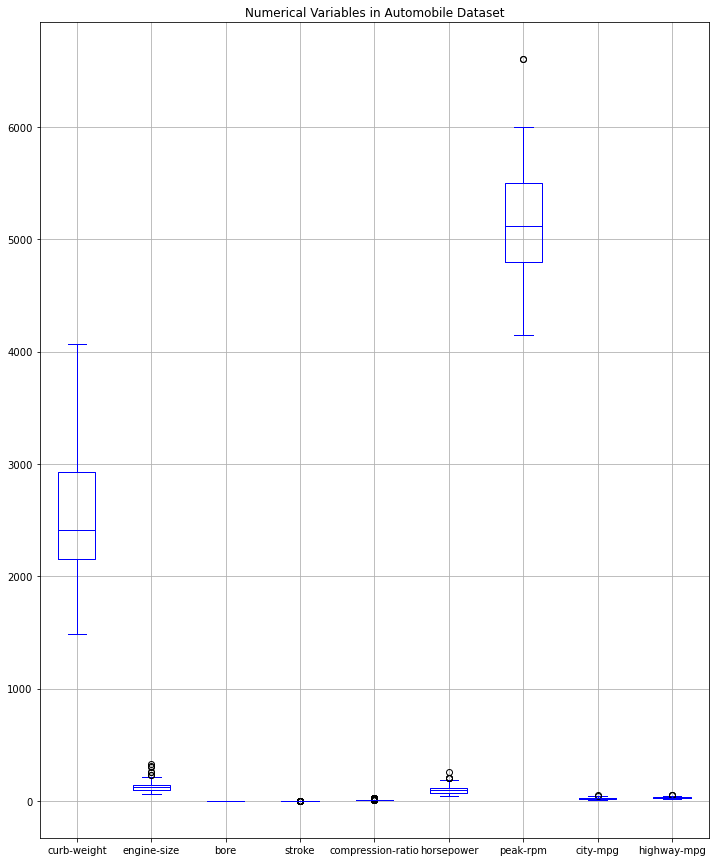

In [21]:
# Taking rest of the numeric columns
numeric_cols = ['curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
plt.figure(figsize=(12,15))
plt.title("Numerical Variables in Automobile Dataset")
df[numeric_cols].boxplot(color='blue')
plt.show()

**1 outlier in peak-rpm**

## (b) Handling Outliers

* **For normalized-losses outliers: Replace with mean value.**
* **For peak-rpm: Remove outlier entry.**

In [22]:
df.rename(columns={'normalized-losses': 'normalizedlosses', 'peak-rpm': 'peakrpm'}, inplace=True)
df.columns

Index(['symboling', 'normalizedlosses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'bodystyle', 'drivewheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [23]:
df['normalizedlosses'].unique()

array([121.8404908, 164.       , 158.       , 192.       , 188.       ,
       121.       ,  98.       ,  81.       , 118.       , 148.       ,
       110.       , 145.       , 137.       , 101.       ,  78.       ,
       106.       ,  85.       , 107.       , 104.       , 113.       ,
       150.       , 129.       , 115.       ,  93.       , 142.       ,
       161.       , 153.       , 125.       , 128.       , 122.       ,
       103.       , 168.       , 108.       , 194.       , 231.       ,
       119.       , 154.       ,  74.       , 186.       ,  83.       ,
       102.       ,  89.       ,  87.       ,  77.       ,  91.       ,
       134.       ,  65.       , 197.       ,  90.       ,  94.       ,
       256.       ,  95.       ])

In [24]:
df['normalizedlosses'] = df['normalizedlosses'].replace(256.0, np.nan)
df['normalizedlosses'].fillna(df['normalizedlosses'].mean(), inplace=True)
df['normalizedlosses'] = df['normalizedlosses'].replace(231.0, np.nan)
df['normalizedlosses'].fillna(df['normalizedlosses'].mean(), inplace=True)
df['normalizedlosses'].unique()

array([121.8404908 , 164.        , 158.        , 192.        ,
       188.        , 121.        ,  98.        ,  81.        ,
       118.        , 148.        , 110.        , 145.        ,
       137.        , 101.        ,  78.        , 106.        ,
        85.        , 107.        , 104.        , 113.        ,
       150.        , 129.        , 115.        ,  93.        ,
       142.        , 161.        , 153.        , 125.        ,
       128.        , 122.        , 103.        , 168.        ,
       108.        , 194.        , 120.60818478, 119.        ,
       154.        ,  74.        , 186.        ,  83.        ,
       102.        ,  89.        ,  87.        ,  77.        ,
        91.        , 134.        ,  65.        , 197.        ,
        90.        ,  94.        , 121.16291752,  95.        ])

In [25]:
df['peakrpm'].unique()

array([5000.        , 5500.        , 5800.        , 4250.        ,
       5400.        , 5100.        , 4800.        , 6000.        ,
       4750.        , 4200.        , 4350.        , 4500.        ,
       5200.        , 4150.        , 5600.        , 5900.        ,
       5118.02030457, 5250.        , 4900.        , 4400.        ,
       6600.        , 5300.        ])

In [26]:
df[df.peakrpm == 6600.0]

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drivewheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
165,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0


This seems like a duplicate entry. Among independent variables only body-style is different. Let's remove these 2 entries.

In [27]:
# Dropping both entries
i = df[((df.peakrpm == 6600.0))].index
df = df.drop(i)

# **Computation for Categorical Variables**

**Printing all categorical variable columns**

In [28]:
df.select_dtypes(include=['object']).copy().head()

,make,fuel-type,aspiration,num-of-doors,bodystyle,drivewheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## (a) Find and Replace: num-of-doors & num-of-cylinders
There are two columns of data where the values are words used to represent numbers: the number of cylinders and number of doors on the car. 

In [29]:
print(df["num-of-doors"].value_counts())
print(df["num-of-cylinders"].value_counts())

four    113
two      84
Name: num-of-doors, dtype: int64
four      153
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64


In [30]:
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df = df.replace(cleanup_nums)
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drivewheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
0,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.840491,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## (b) Dummy Variable Encoding for bodystyle column and drivewheels

Label encoding is simply converting each value in a column to a number.

In [31]:
print(df['bodystyle'].unique())
print(df['drivewheels'].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']


In [32]:
df = pd.get_dummies(df, columns=["bodystyle", "drivewheels"], prefix=["body", "drive"],drop_first=True)
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,...,peakrpm,city-mpg,highway-mpg,price,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_fwd,drive_rwd
0,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000.0,21,27,13495.0,0,0,0,0,0,1
1,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000.0,21,27,16500.0,0,0,0,0,0,1
2,1,121.840491,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,5000.0,19,26,16500.0,0,1,0,0,0,1
3,2,164.000000,audi,gas,std,4,front,99.8,176.6,66.2,...,5500.0,24,30,13950.0,0,0,1,0,1,0
4,2,164.000000,audi,gas,std,4,front,99.4,176.6,66.4,...,5500.0,18,22,17450.0,0,0,1,0,0,0


## (c) Custom Binary Encoding for engine-type

In [33]:
df["engine-type"].value_counts()

ohc      143
ohcf      15
ohcv      13
l         12
dohc      10
rotor      4
Name: engine-type, dtype: int64

For the sake of discussion, maybe all we care about is whether or not the engine is an Overhead Cam (OHC) or not. In other words, the various versions of OHC are all the same for this analysis.

In [34]:
df["OHC_Code"] = np.where(df["engine-type"].str.contains("ohc"), 1, 0)
df[["make", "engine-type", "OHC_Code"]].head()

,make,engine-type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


## (d) Ordinal Encoding for make column

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["make_code"] = ord_enc.fit_transform(df[["make"]])
df[["make", "make_code"]].head(11)

,make,make_code
0,alfa-romero,0.0
1,alfa-romero,0.0
2,alfa-romero,0.0
3,audi,1.0
4,audi,1.0
5,audi,1.0
6,audi,1.0
7,audi,1.0
8,audi,1.0
10,bmw,2.0


In [36]:
print(df.columns)

Index(['symboling', 'normalizedlosses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg', 'price',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',
       'drive_fwd', 'drive_rwd', 'OHC_Code', 'make_code'],
      dtype='object')


# **Selecting Necessary Columns for ML Model**

In [37]:
df.select_dtypes(include=np.number).columns.tolist()

['symboling',
 'normalizedlosses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peakrpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'drive_fwd',
 'drive_rwd',
 'OHC_Code',
 'make_code']

In [38]:
feed = df[['symboling', 'normalizedlosses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
           'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg', 'price', 'num-of-doors', 'num-of-cylinders', 
           'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon', 'drive_fwd', 'drive_rwd', 'OHC_Code', 'make_code']]
feed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   normalizedlosses   197 non-null    float64
 2   wheel-base         197 non-null    float64
 3   length             197 non-null    float64
 4   width              197 non-null    float64
 5   height             197 non-null    float64
 6   curb-weight        197 non-null    int64  
 7   engine-size        197 non-null    int64  
 8   bore               197 non-null    float64
 9   stroke             197 non-null    float64
 10  compression-ratio  197 non-null    float64
 11  horsepower         197 non-null    float64
 12  peakrpm            197 non-null    float64
 13  city-mpg           197 non-null    int64  
 14  highway-mpg        197 non-null    int64  
 15  price              197 non-null    float64
 16  num-of-doors       197 non

**Now we'll fit our linear regression & Gradient Boosting Regressor models on these numerical variables.**

# **6. Building Machine Learning Model** 🤖

## (a) Preparing Training and Testing datasets

In [39]:
# Taking all independent variable columns
df_train_x = feed.drop('price',axis = 1)
df_train_x.describe()

,symboling,normalizedlosses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-doors,num-of-cylinders,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_fwd,drive_rwd,OHC_Code,make_code
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.842640,120.127050,98.866497,174.324365,65.915736,53.785787,2560.862944,127.340102,3.332882,3.257321,...,3.147208,4.370558,0.040609,0.340102,0.461929,0.126904,0.588832,0.370558,0.918782,12.294416
std,1.265963,29.391750,6.101313,12.372840,2.108318,2.456292,521.077834,41.812276,0.269743,0.318472,...,0.991626,1.068924,0.197886,0.474950,0.499819,0.333713,0.493299,0.484185,0.273866,6.244558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,98.000000,94.500000,166.800000,64.200000,52.000000,2145.000000,97.000000,3.150000,3.120000,...,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
50%,1.000000,121.840491,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.330000,3.290000,...,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,12.000000
75%,2.000000,134.000000,102.400000,183.500000,66.900000,55.600000,2935.000000,145.000000,3.590000,3.410000,...,4.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,19.000000
max,3.000000,197.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [40]:
# Target variable column
df_train_y = feed['price']
df_train_y.describe

<bound method NDFrame.describe of 0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 197, dtype: float64>

## (b) Splitting of Training & Testing sets

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.3, random_state=42)

In [42]:
np.random.seed(42)
models = [ LinearRegression(), GradientBoostingRegressor(), 
          Ridge(), Lasso(), RandomForestRegressor()]

In [43]:
results= {}
for model in models:
    reg = model.fit(x_train, y_train)
    predictions = reg.predict(x_test)
    results[model] = round(r2_score(y_test, predictions)*100,2)    
results

{LinearRegression(): 88.96,
 GradientBoostingRegressor(): 92.95,
 Ridge(): 88.57,
 Lasso(): 88.92,
 RandomForestRegressor(): 91.64}

<AxesSubplot:xlabel='price'>

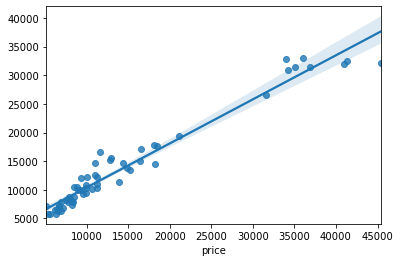

In [44]:
sns.regplot(x = y_test, y = predictions)

## Gradient Boosting Regressor with r2 score of 0.93 performed better than other regression models